In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pprint as p

from scipy.cluster.vq import whiten, kmeans2

In [3]:
# API description http://api.football-data.org/docs/v1/index.html
TOKEN = 'd84ee01a7bf64b9184fe76058f790cc8'
teams_url = 'http://api.football-data.org/v1/soccerseasons/439/teams'

In [4]:
def call_api(url, result_key):
    json = ()
    try:
        json = requests.get(url, headers= {'X-Auth-Token':TOKEN}).json()
        return json[result_key]
    except:
        print (json)
        return None

In [6]:
teams = call_api (teams_url, 'teams')
p.pprint (teams)

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/496/fixtures'},
             'players': {'href': 'http://api.football-data.org/v1/teams/496/players'},
             'self': {'href': 'http://api.football-data.org/v1/teams/496'}},
  'code': None,
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/6/63/Rio_Ave_FC.svg',
  'name': 'FC Rio Ave',
  'shortName': 'Rio Ave',
  'squadMarketValue': '26,775,000 €'},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/503/fixtures'},
             'players': {'href': 'http://api.football-data.org/v1/teams/503/players'},
             'self': {'href': 'http://api.football-data.org/v1/teams/503'}},
  'code': 'FCP',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/e/ed/FC_Porto_1922-2005.svg',
  'name': 'FC Porto',
  'shortName': 'Porto',
  'squadMarketValue': '179,750,000 €'},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/583/fixtures'},
             'players': {'href': 

In [30]:
for team in teams:
    market_value = float(team['squadMarketValue'].split(' ')[0].replace(',','')) if team['squadMarketValue'] is not None else 0
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    looses = 0    
    for f in fixtures:
        goals_away = f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] is not None else 0
        goals_home = f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] is not None else 0
        if team['name'] == f['homeTeamName']  :
            looses += 1 if goals_away > goals_home else 0
        else:
            looses += 1 if goals_home > goals_away else 0
    print ('Team "{}", market value {} €, {} looses'.format(team['name'], market_value, looses))            
    team['looses'] = looses
    team['market_value'] = market_value

Team "FC Rio Ave", market value 26775000.0 €, 12 looses
Team "FC Porto", market value 179750000.0 €, 4 looses
Team "Moreirense FC", market value 13900000.0 €, 17 looses
Team "FC Paços de Ferreira", market value 20400000.0 €, 12 looses
Team "Sporting CP", market value 168750000.0 €, 9 looses
Team "Maritimo Funchal", market value 20300000.0 €, 9 looses
Team "CD Tondela", market value 10175000.0 €, 17 looses
Team "SL Benfica", market value 202850000.0 €, 5 looses
Team "Boavista Porto FC", market value 18625000.0 €, 11 looses
Team "FC Arouca", market value 17850000.0 €, 17 looses
Team "Vitoria Setubal", market value 19775000.0 €, 13 looses
Team "C.F. Os Belenenses", market value 16700000.0 €, 14 looses
Team "Vitoria Guimaraes", market value 34000000.0 €, 6 looses
Team "Sporting Braga", market value 47600000.0 €, 7 looses
Team "GD Estoril Praia", market value 18350000.0 €, 15 looses
Team "Feirense", market value 0 €, 14 looses
Team "Nacional Funchal", market value 17500000.0 €, 18 looses
Te

In [33]:
team_for_pd = []
for team in teams:
    team_for_pd.append({'name': team['name'], 'looses':team['looses'], 'market_value': team['market_value']})
team_for_pd                 

[{'looses': 12, 'market_value': 26775000.0, 'name': 'FC Rio Ave'},
 {'looses': 4, 'market_value': 179750000.0, 'name': 'FC Porto'},
 {'looses': 17, 'market_value': 13900000.0, 'name': 'Moreirense FC'},
 {'looses': 12, 'market_value': 20400000.0, 'name': 'FC Paços de Ferreira'},
 {'looses': 9, 'market_value': 168750000.0, 'name': 'Sporting CP'},
 {'looses': 9, 'market_value': 20300000.0, 'name': 'Maritimo Funchal'},
 {'looses': 17, 'market_value': 10175000.0, 'name': 'CD Tondela'},
 {'looses': 5, 'market_value': 202850000.0, 'name': 'SL Benfica'},
 {'looses': 11, 'market_value': 18625000.0, 'name': 'Boavista Porto FC'},
 {'looses': 17, 'market_value': 17850000.0, 'name': 'FC Arouca'},
 {'looses': 13, 'market_value': 19775000.0, 'name': 'Vitoria Setubal'},
 {'looses': 14, 'market_value': 16700000.0, 'name': 'C.F. Os Belenenses'},
 {'looses': 6, 'market_value': 34000000.0, 'name': 'Vitoria Guimaraes'},
 {'looses': 7, 'market_value': 47600000.0, 'name': 'Sporting Braga'},
 {'looses': 15, '

In [34]:
teams_pd = pd.DataFrame(team_for_pd)
del teams_pd['name']

In [39]:
whitened = whiten(teams_pd.as_matrix())
colors_map ={0: 'r', 1: 'g', 2: 'b', 3:'y', 4: 'm'}

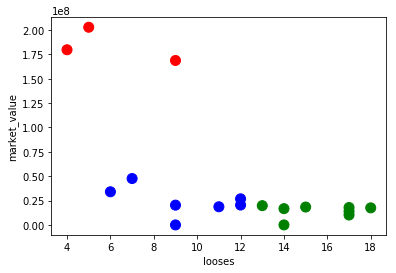

In [42]:
#3 clasters
centroids, cluster_map = kmeans2(whitened, 3)
colors = [colors_map[c] for c in cluster_map]
teams_pd.plot.scatter(x='looses', y='market_value', c=colors, s=100)

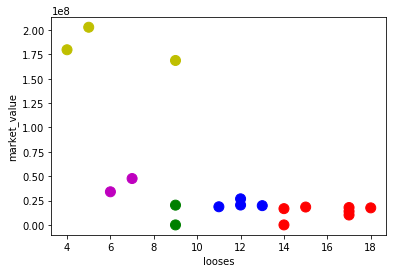

In [45]:
#5 clasters
centroids, cluster_map = kmeans2(whitened, 5)
colors = [colors_map[c] for c in cluster_map]
teams_pd.plot.scatter(x='looses', y='market_value', c=colors, s=100)